In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
import random
import numpy as np

In [4]:
def enhance_with_ones(X):
    return np.c_[np.ones((len(X), 1)), X]

In [5]:
X_with_one = enhance_with_ones(iris['data'][:, (2, 3)])

In [6]:
def one_hot_encode(y):
    K = np.unique(iris['target']).size
    return np.array([[(j == i).astype(np.int) for i in range(K)] for j in y])

one_hot_encode(iris['target'])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [7]:
Y_one_hot = one_hot_encode(iris['target'])

In [8]:
def train_val_split(X, Y, train_ratio):
    indices = np.arange(len(X))
    random.shuffle(indices)
    max_train_index = int(len(X) * train_ratio)
    train_indices = indices[:max_train_index]
    val_indices = indices[max_train_index:]
    return  [
        X[train_indices],
        Y[train_indices],
        X[val_indices],
        Y[val_indices]
    ]    

In [9]:
X_train, Y_train, X_val, Y_val = train_val_split(X_with_one, Y_one_hot, .5)

In [10]:
X_train[0], Y_train[0]

(array([1. , 5.8, 1.8]), array([0, 0, 1]))

In [11]:
m = len(X_train)
n = len(X_train[0])
K = np.unique(iris['target']).size

In [12]:
m, n, K

(75, 3, 3)

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
Th = np.random.rand(K, n)

In [15]:
def softmax_score(Th, k, x):
    return Th[k].T.dot(x)

[softmax_score(Th, i, X_train[3]) for i in range(K)]

[1.5609181026546088, 1.1978314944443735, 0.3607870734489154]

In [16]:
def softmax(Th, k, x):
    K = Th.shape[0]
    return np.exp(softmax_score(Th, k, x)) / np.sum([np.exp(softmax_score(Th, i, x)) for i in range(K)])
[softmax(Th, k, X_train[0]) for k in range(K)]

[0.9253256950072812, 0.06719381456799613, 0.007480490424722669]

In [17]:
def classifier(Th, x):
    K = Th.shape[0]
    return np.argmax([softmax_score(Th, i, x) for i in range(K)])
[classifier(Th, X_train[i]) for i in range(len(X_train))]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
def cross_entropy_cost(Th, X, Y):
    m = len(X)
    K = Th.shape[0]
    return -1.0 / m * np.sum([[Y[i, k] * np.log(softmax(Th, k, X[i])) for k in range(K)] for i in range(m)])

In [19]:
cross_entropy_cost(Th, X_train, Y_train)

2.34228009550667

In [20]:
def cross_entropy_gradient(Th, X, Y):
    m = len(X)
    K = Th.shape[0]
    return np.array([1.0 / m * np.sum([(softmax(Th, k, X[i]) - Y[i, k]) * X[i] for i in range(m)], axis=0) for k in range(K)])

In [21]:
cross_entropy_gradient(Th, X_train, Y_train)

array([[ 0.41191746,  2.59621836,  0.91039769],
       [-0.18209459, -1.1156432 , -0.36351205],
       [-0.22982287, -1.48057516, -0.54688564]])

# Batch gradient descent

In [22]:
eta = .5
patience = 5.0
Th = np.zeros((K, n))
train_costs = []
val_costs = []
lowest_val_cost_index = None
#i = 0
for i in range(1000):
    train_costs.append(cross_entropy_cost(Th, X_train, Y_train))
    val_cost = cross_entropy_cost(Th, X_val, Y_val)
    val_costs.append(val_cost)
    if lowest_val_cost_index is None or  val_cost < val_costs[lowest_val_cost_index]:
        lowest_val_cost_index = i
        Th_best = np.copy(Th)
    elif i > 20 and i > lowest_val_cost_index * patience:
        print("breaking: {}, {}".format(i, lowest_val_cost_index))
        break
    grad = cross_entropy_gradient(Th, X_train, Y_train)
    Th -= eta * grad
    #i += 1

breaking: 21, 3


In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

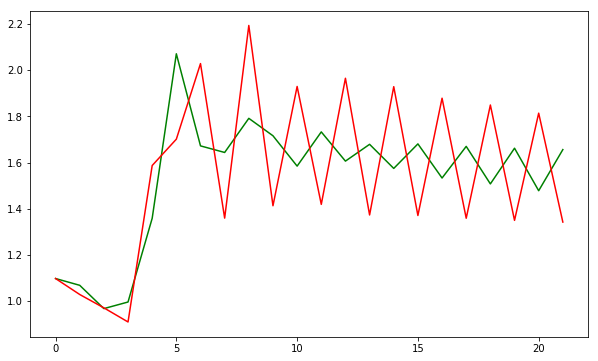

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train_costs, "g")
plt.plot(val_costs, "r")
#plt.axis([0, 1600, 0, 0.2])

In [25]:
Th

array([[ 1.32339822, -0.19820935, -0.49647212],
       [-0.42182285, -0.25701198, -0.25646903],
       [-0.90157537,  0.45522133,  0.75294115]])

In [26]:
Th_best

array([[ 0.2323181 , -0.16573211, -0.14253921],
       [-0.0811886 ,  0.00641258, -0.01152087],
       [-0.1511295 ,  0.15931953,  0.15406008]])

In [27]:
X_val[0], Y_val[0]

(array([1. , 4.5, 1.5]), array([0, 1, 0]))

In [28]:
classifier(Th, X_val[0])

2

In [29]:
train_costs[-1], val_costs[-1]

(1.6565666587884182, 1.3429271167788812)

[0, 7, 0, 3.5]

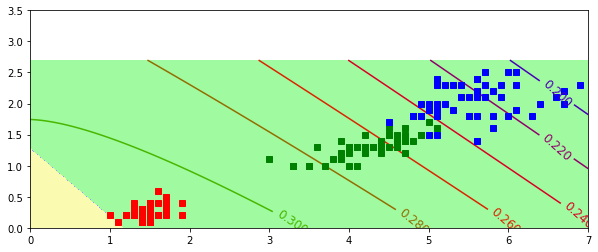

In [30]:
plt.figure(figsize=(10, 4))
X = iris['data']
y = iris['target']
for klass, colour in zip(range(3), list("rgb")):
    plt.plot(X[y==klass, 2], X[y==klass, 3], "{}s".format(colour))

    
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[np.ones((x0.size, 1)), x0.ravel(), x1.ravel()]


y_proba_1 = np.array([softmax(Th_best, 1, X_new[i]) for i in range(X_new.shape[0])])
y_predict = np.array([classifier(Th_best, X_new[i]) for i in range(X_new.shape[0])])
zz1 = y_proba_1.reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.axis([0, 7, 0, 3.5])